In [692]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

In [693]:
house_train=pd.read_csv('train.csv', index_col=0)

In [694]:
house_train2=house_train.copy()

# Add Price Per Sqft Column

In [695]:
house_train2['PricePerSq']=house_train2['SalePrice']/house_train2['GrLivArea']
house_train2

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,PricePerSq
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,121.929825
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,143.819334
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,125.139978
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,81.537566
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,113.739763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,8,2007,WD,Normal,175000,106.253795
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000,101.302460
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500,113.888889


# Examine Outliers And Remove Outliers

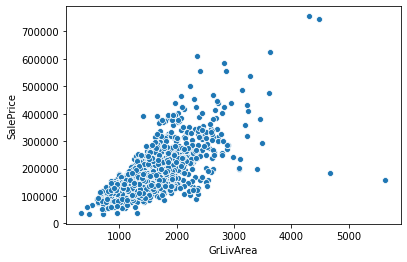

In [696]:
sns.scatterplot(x='GrLivArea', y='SalePrice', data=house_train2)

In [697]:
house_train2[house_train2['GrLivArea']> 4500]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,PricePerSq
Id,,,,,,,,,,,,,,,,,,,,,
524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,...,NaN,NaN,NaN,0,10,2007,New,Partial,184750,39.510265
1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,...,Gd,NaN,NaN,0,1,2008,New,Partial,160000,28.358738


In [698]:
house_train2=house_train2.drop([524,1299], axis=0)  #drop outliers
house_train2

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,PricePerSq
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,121.929825
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,143.819334
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,125.139978
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,81.537566
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,113.739763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,8,2007,WD,Normal,175000,106.253795
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000,101.302460
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500,113.888889


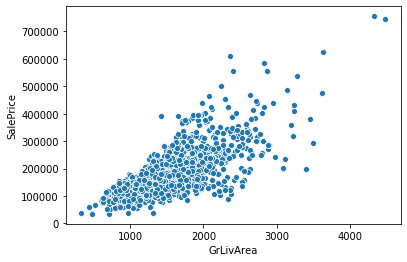

In [934]:
sns.scatterplot(x='GrLivArea', y='SalePrice', data=house_train2)

# Feature Engineering

In [699]:
house_train2['Age'] = house_train2['YrSold']-house_train2['YearBuilt']

In [700]:
house_train2['RemodelAge']=house_train2['YrSold'] - house_train2['YearRemodAdd']

In [701]:
house_train2['Remodeled'] =house_train2['YearRemodAdd']!=house_train2['YearBuilt']

In [702]:
house_train2['GarageAge']=house_train2['YrSold']- house_train2['GarageYrBlt']

In [703]:
house_train2['HasGarage']= house_train2['GarageArea']!= 0

In [704]:
house_train2[house_train2['HasGarage']==False]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,YrSold,SaleType,SaleCondition,SalePrice,PricePerSq,Age,RemodelAge,Remodeled,GarageAge,HasGarage
Id,,,,,,,,,,,,,,,,,,,,,
40,90,RL,65.0,6040,Pave,NaN,Reg,Lvl,AllPub,Inside,...,2008,WD,AdjLand,82000,71.180556,53,53,False,NaN,False
49,190,RM,33.0,4456,Pave,NaN,Reg,Lvl,AllPub,Inside,...,2009,New,Partial,113000,77.823691,89,1,True,NaN,False
79,90,RL,72.0,10778,Pave,NaN,Reg,Lvl,AllPub,Inside,...,2010,WD,Normal,136500,77.205882,42,42,False,NaN,False
89,50,C (all),105.0,8470,Pave,NaN,IR1,Lvl,AllPub,Corner,...,2009,ConLD,Abnorml,85000,55.701180,94,27,True,NaN,False
90,20,RL,60.0,8070,Pave,NaN,Reg,Lvl,AllPub,Inside,...,2007,WD,Normal,123600,124.848485,13,12,True,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1350,70,RM,50.0,5250,Pave,Pave,Reg,Lvl,AllPub,Inside,...,2008,WD,Normal,122000,51.738762,136,21,True,NaN,False
1408,20,RL,NaN,8780,Pave,NaN,IR1,Lvl,AllPub,Corner,...,2009,WD,Normal,112000,134.453782,24,24,False,NaN,False
1450,180,RM,21.0,1533,Pave,NaN,Reg,Lvl,AllPub,Inside,...,2006,WD,Abnorml,92000,146.031746,36,36,False,NaN,False


In [705]:
house_train2[39:]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,YrSold,SaleType,SaleCondition,SalePrice,PricePerSq,Age,RemodelAge,Remodeled,GarageAge,HasGarage
Id,,,,,,,,,,,,,,,,,,,,,
40,90,RL,65.0,6040,Pave,NaN,Reg,Lvl,AllPub,Inside,...,2008,WD,AdjLand,82000,71.180556,53,53,False,NaN,False
41,20,RL,84.0,8658,Pave,NaN,Reg,Lvl,AllPub,Inside,...,2006,WD,Abnorml,160000,120.845921,41,41,False,41.0,True
42,20,RL,115.0,16905,Pave,NaN,Reg,Lvl,AllPub,Inside,...,2007,WD,Normal,170000,128.012048,48,48,False,48.0,True
43,85,RL,NaN,9180,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,2007,WD,Normal,144000,162.895928,24,24,False,24.0,True
44,20,RL,NaN,9200,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,2008,WD,Normal,130250,138.859275,33,28,True,31.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,2007,WD,Normal,175000,106.253795,8,7,True,8.0,True
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,2010,WD,Normal,210000,101.302460,32,22,True,32.0,True
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,2010,WD,Normal,266500,113.888889,69,4,True,69.0,True


# Create Correlation Matrix

In [706]:
numeric_variables=house_train2.loc[:,house_train2.dtypes!=object].drop(['MSSubClass', 'MoSold','Remodeled', 'HasGarage'], axis=1)   

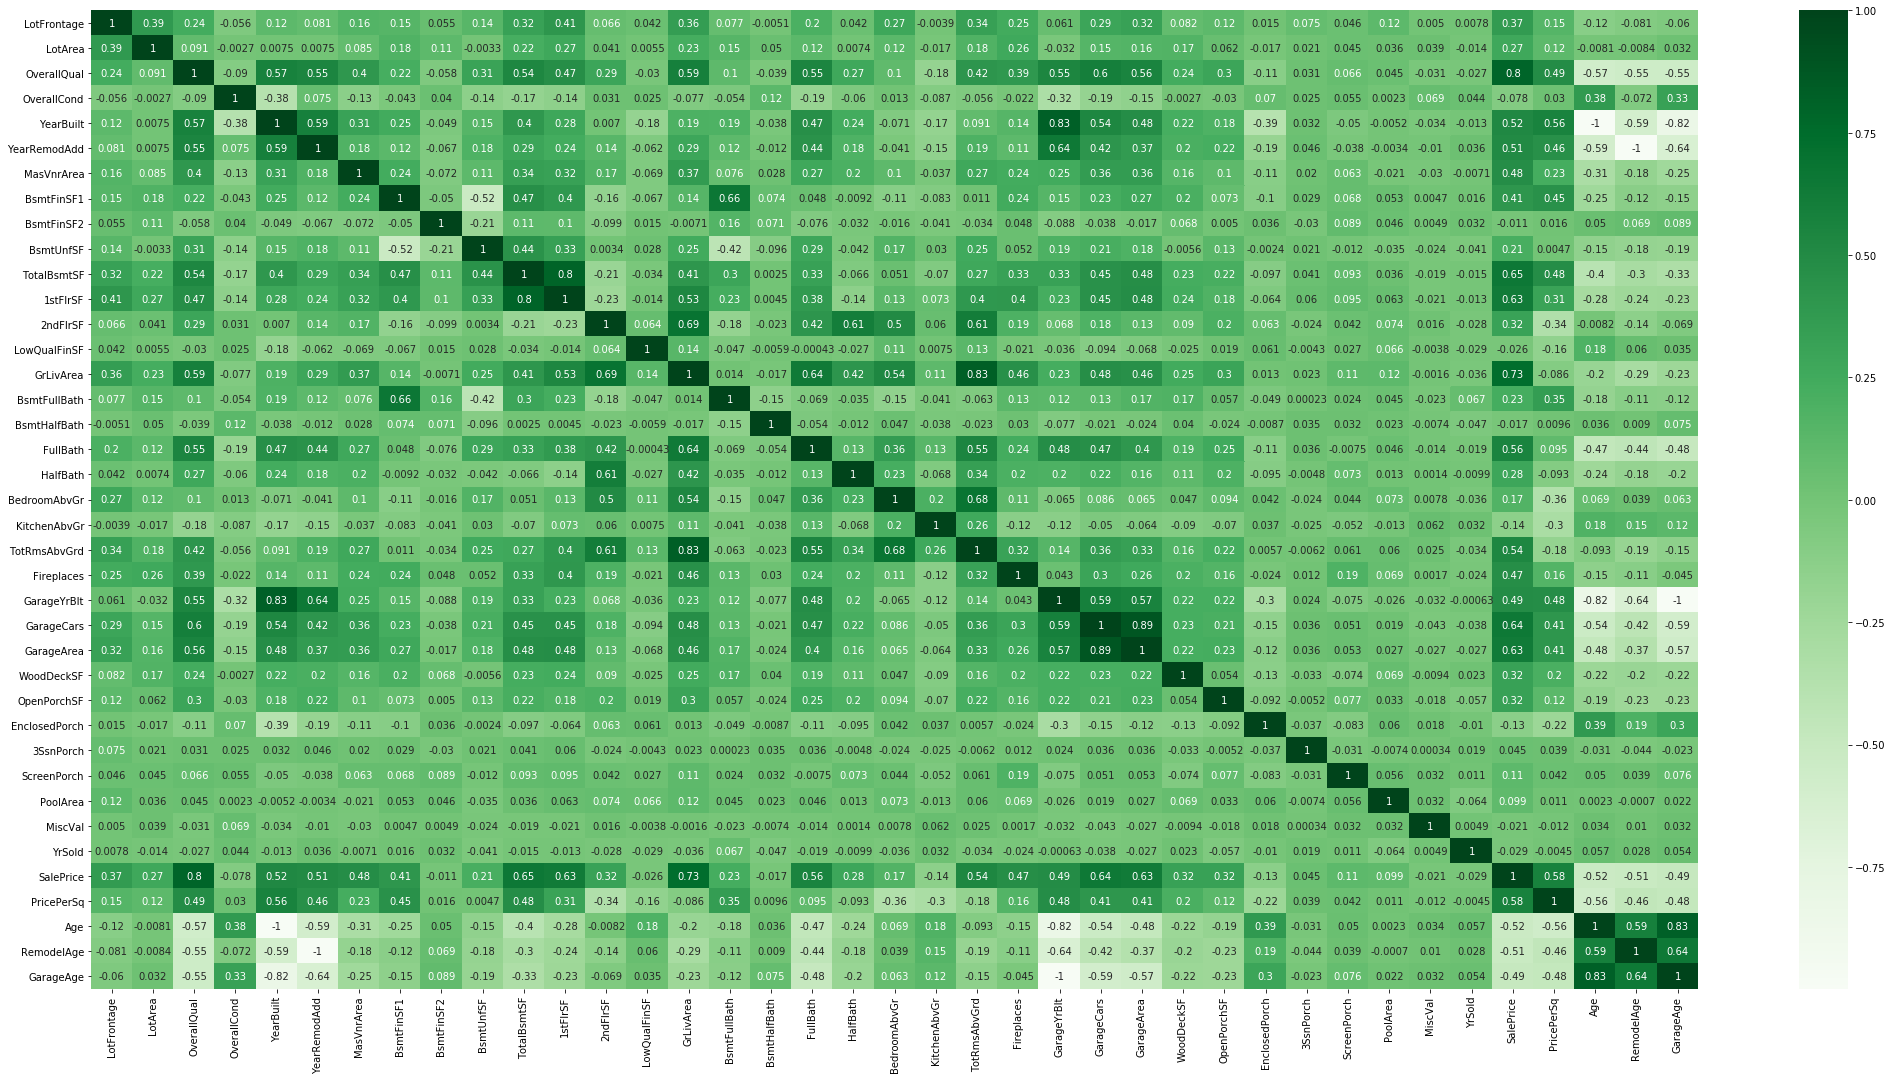

In [707]:
plt.figure(figsize=(36,18))       #correlation matrix 
numeric_variables_corr=numeric_variables.corr(method='pearson')
sns.heatmap(numeric_variables_corr, annot=True, cmap="Greens")

# Quality vs Sale Price & Price Per Square

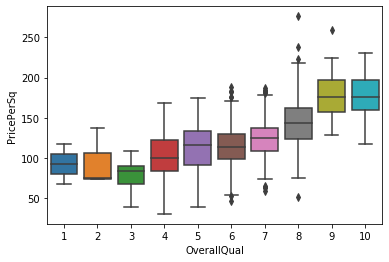

In [708]:
sns.boxplot(x='OverallQual', y='PricePerSq', data=house_train2)

In [935]:
house_train2.groupby('OverallQual')['PricePerSq'].mean()

OverallQual
1      92.571273
2      95.183628
3      79.895426
4     102.401838
5     112.746779
6     114.346688
7     124.494470
8     144.511059
9     178.693921
10    176.234554
Name: PricePerSq, dtype: float64

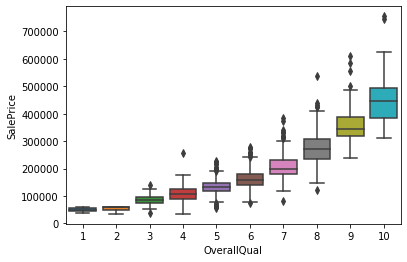

In [709]:
sns.boxplot(x='OverallQual', y='SalePrice', data=house_train2)

In [710]:
house_train2['OverallQual'].corr(house_train2['SalePrice'])

0.7957742674249434

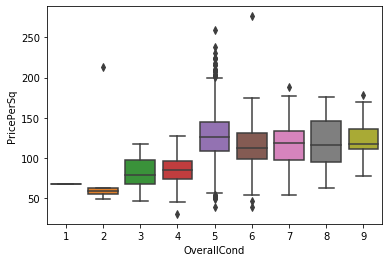

In [711]:
sns.boxplot(x='OverallCond',  y='PricePerSq', data=house_train2)

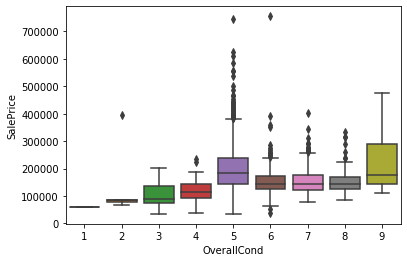

In [712]:
sns.boxplot(x='OverallCond',  y='SalePrice', data=house_train2)

In [713]:
my_order = house_train2.groupby('ExterQual')['PricePerSq'].median().sort_values(ascending=True).index

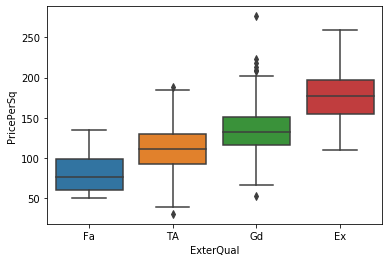

In [714]:
sns.boxplot(x='ExterQual',  y='PricePerSq', order=my_order, data=house_train2)

In [715]:
my_order2 = ['Fa', "TA", 'Gd', 'Ex']

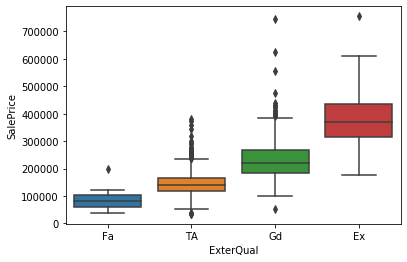

In [716]:
sns.boxplot(x='ExterQual',  y='SalePrice', order=my_order2, data=house_train2)

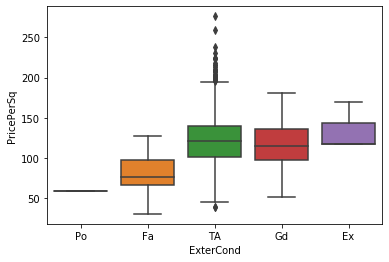

In [717]:
my_order3 = ['Po','Fa', "TA", 'Gd', 'Ex']
sns.boxplot(x='ExterCond',  y='PricePerSq', order=my_order3, data=house_train2)

In [718]:
my_order3 = ['Po','Fa', "TA", 'Gd', 'Ex']

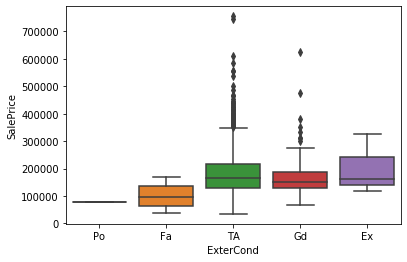

In [719]:
sns.boxplot(x='ExterCond',  y='SalePrice', order=my_order3, data=house_train2)

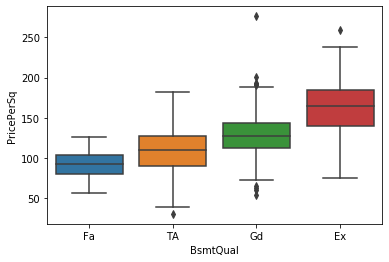

In [723]:
sns.boxplot(x='BsmtQual',  y='PricePerSq', order=my_order2, data=house_train2)

In [802]:
house_train2.groupby('BsmtQual')['SalePrice'].mean().sort_values(ascending=False)

BsmtQual
Ex    329640.470588
Gd    202688.478964
TA    140759.818182
Fa    115692.028571
Name: SalePrice, dtype: float64

In [801]:
house_train2.groupby('BsmtQual')['SalePrice'].median().sort_values(ascending=False)

BsmtQual
Ex    318000
Gd    192070
TA    135500
Fa    112000
Name: SalePrice, dtype: int64

In [800]:
house_train2.groupby('BsmtQual')['PricePerSq'].median().sort_values(ascending=False)

BsmtQual
Ex    164.489864
Gd    127.239305
TA    109.342561
Fa     92.178771
Name: PricePerSq, dtype: float64

In [804]:
house_train2.groupby('BsmtQual')['PricePerSq'].mean().sort_values(ascending=False)

BsmtQual
Ex    164.530977
Gd    128.626064
TA    108.659371
Fa     91.497656
Name: PricePerSq, dtype: float64

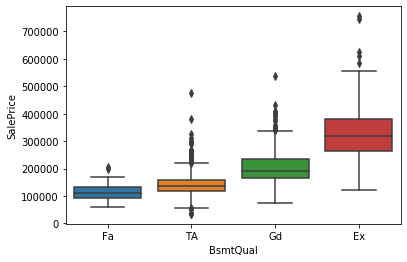

In [724]:
sns.boxplot(x='BsmtQual',  y='SalePrice', order=my_order2, data=house_train2)

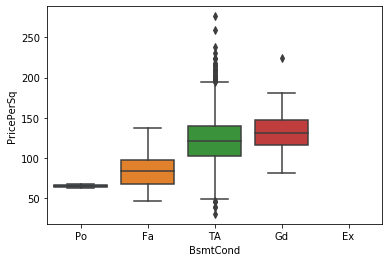

In [725]:
sns.boxplot(x='BsmtCond',  y='PricePerSq', order=my_order3, data=house_train2)

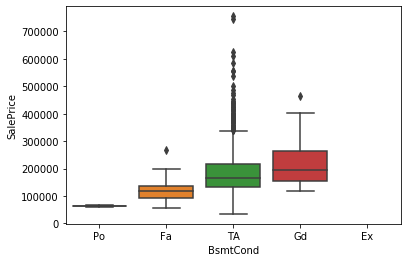

In [726]:
sns.boxplot(x='BsmtCond',  y='SalePrice', order=my_order3, data=house_train2)

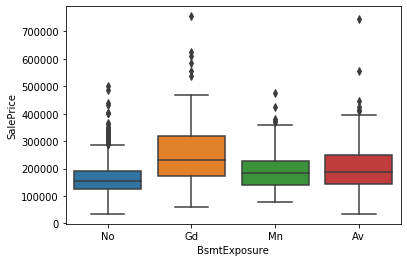

In [727]:
sns.boxplot(x='BsmtExposure', y='SalePrice', data=house_train2)

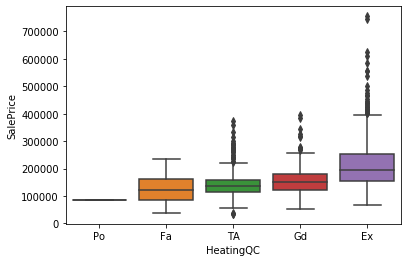

In [728]:
sns.boxplot(x='HeatingQC',  y='SalePrice', order=my_order3, data=house_train2)

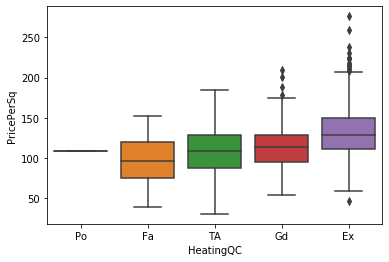

In [729]:
sns.boxplot(x='HeatingQC',  y='PricePerSq', order=my_order3, data=house_train2)

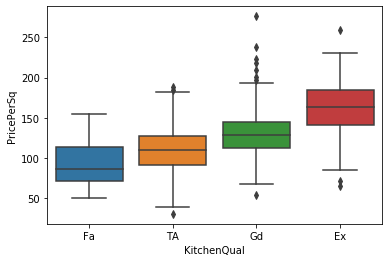

In [730]:
sns.boxplot(x='KitchenQual',  y='PricePerSq', order=my_order2, data=house_train2)

In [933]:
house_train2.groupby('KitchenQual')['GrLivArea'].mean().sort_values(ascending=False)

KitchenQual
Ex    2047.183673
Gd    1660.610922
TA    1332.770068
Fa    1254.641026
Name: GrLivArea, dtype: float64

In [776]:
house_train2.groupby('KitchenQual')['PricePerSq'].median().sort_values(ascending=False)

KitchenQual
Ex    163.786485
Gd    128.290473
TA    109.342561
Fa     86.580087
Name: PricePerSq, dtype: float64

In [778]:
house_train2.groupby('KitchenQual')['PricePerSq'].mean().sort_values(ascending=False)

KitchenQual
Ex    162.706015
Gd    129.936768
TA    109.336931
Fa     90.198790
Name: PricePerSq, dtype: float64

In [910]:
(109.336931-90.198790)/90.198790  #FA to TA

0.2121773584767601

In [911]:
(129.936768-109.336931)/109.336931  #TA to GD

0.18840694367029556

In [912]:
(162.706015-129.936768)/129.936768   #GD to  EX

0.25219379783249657

In [777]:
house_train2.groupby('KitchenQual')['SalePrice'].median().sort_values(ascending=False)

KitchenQual
Ex    318030.5
Gd    201400.0
TA    137000.0
Fa    115000.0
Name: SalePrice, dtype: float64

In [779]:
house_train2.groupby('KitchenQual')['SalePrice'].mean().sort_values(ascending=False)

KitchenQual
Ex    331742.010204
Gd    212116.023891
TA    139962.511565
Fa    105565.205128
Name: SalePrice, dtype: float64

In [913]:
(139962.511565-105565.205128)/105565.205128  #FA-TA

0.3258394316128363

In [915]:
(212116.023891-139962.511565)/139962.511565   #TA-GD

0.5155202741020489

In [917]:
(331742.010204- 212116.023891)/ 212116.023891  #GD_EX

0.5639648722364897

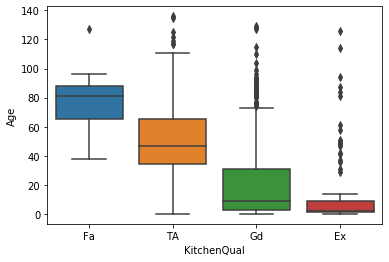

In [918]:
sns.boxplot(x='KitchenQual',  y='Age',order=my_order2, data=house_train2)

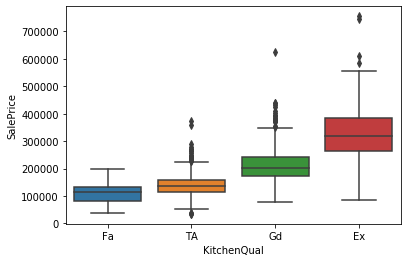

In [731]:
sns.boxplot(x='KitchenQual',  y='SalePrice',order=my_order2, data=house_train2)

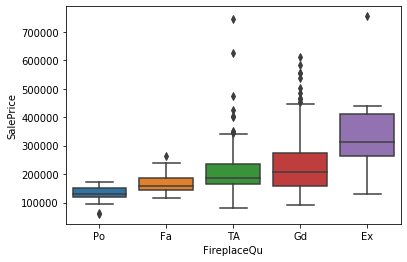

In [743]:
sns.boxplot(x='FireplaceQu',  y='SalePrice', order=my_order3, data=house_train2)

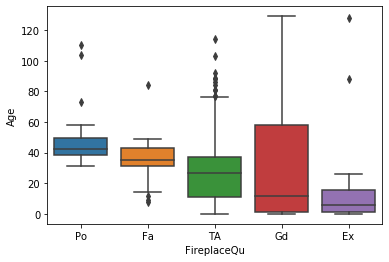

In [925]:
sns.boxplot(x='FireplaceQu',  y='Age', order=my_order3, data=house_train2)

In [926]:
house_train2.groupby('FireplaceQu')['Age'].median().sort_values(ascending=False)

FireplaceQu
Po    42.5
Fa    35.0
TA    27.0
Gd    12.0
Ex     6.0
Name: Age, dtype: float64

In [927]:
house_train2.groupby('FireplaceQu')['Age'].mean().sort_values(ascending=False)

FireplaceQu
Po    49.650000
Fa    34.212121
Gd    31.642857
TA    28.000000
Ex    15.958333
Name: Age, dtype: float64

In [789]:
house_train2.groupby('FireplaceQu')['SalePrice'].median().sort_values(ascending=False)

FireplaceQu
Ex    314250
Gd    207000
TA    187500
Fa    158000
Po    131500
Name: SalePrice, dtype: int64

In [790]:
house_train2.groupby('FireplaceQu')['SalePrice'].mean().sort_values(ascending=False)

FireplaceQu
Ex    337712.500000
Gd    226637.005291
TA    205723.488818
Fa    167298.484848
Po    129764.150000
Name: SalePrice, dtype: float64

In [932]:
house_train2.groupby('FireplaceQu')['GrLivArea'].mean().sort_values(ascending=False)

FireplaceQu
Ex    2240.250000
TA    1759.894569
Gd    1729.576720
Fa    1354.636364
Po    1199.750000
Name: GrLivArea, dtype: float64

In [792]:
house_train2.groupby('FireplaceQu')['PricePerSq'].mean().sort_values(ascending=False)

FireplaceQu
Ex    155.556566
Gd    131.144000
Fa    125.359901
TA    117.879840
Po    113.531177
Name: PricePerSq, dtype: float64

In [928]:
(117.879840-113.531177)/113.531177

0.03830368991946593

In [929]:
(125.359901-117.879840)/117.879840

0.06345496397009015

In [930]:
(131.144000-125.359901)/125.359901

0.04613994549979752

In [931]:
(155.556566-131.144000)/131.144000

0.1861508418227292

In [793]:
house_train2.groupby('FireplaceQu')['PricePerSq'].median().sort_values(ascending=False)

FireplaceQu
Ex    160.086769
Po    127.735598
Gd    127.196326
Fa    122.887865
TA    115.079365
Name: PricePerSq, dtype: float64

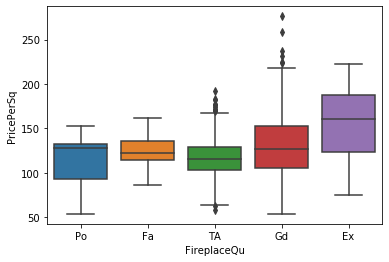

In [733]:
sns.boxplot(x='FireplaceQu',  y='PricePerSq',  order=my_order3, data=house_train2)

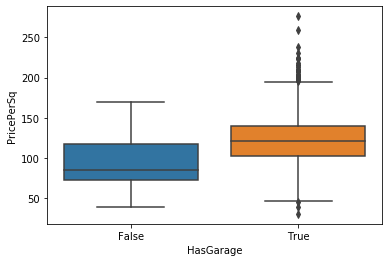

In [739]:
sns.boxplot(x='HasGarage',  y='PricePerSq', data=house_train2)

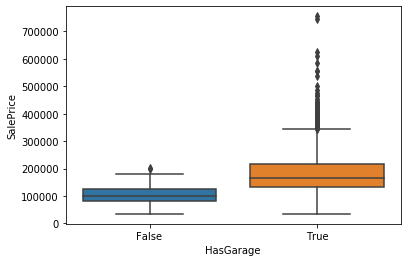

In [740]:
sns.boxplot(x='HasGarage',  y='SalePrice', data=house_train2)

In [749]:
house_train2.groupby('HasGarage')['SalePrice'].mean().sort_values(ascending=False)

HasGarage
True     185498.544662
False    103317.283951
Name: SalePrice, dtype: float64

In [750]:
house_train2.groupby('HasGarage')['PricePerSq'].mean().sort_values(ascending=False)

HasGarage
True     122.269806
False     93.864315
Name: PricePerSq, dtype: float64

In [754]:
(185498.544662-103317.283951)/103317.283951

0.7954260658843477

In [755]:
(122.269806-93.864315)/93.864315

0.30262289774340756

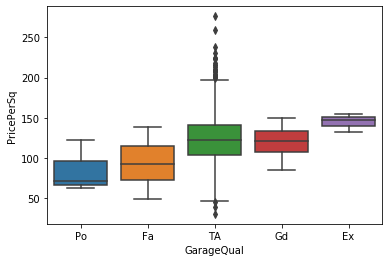

In [734]:
sns.boxplot(x='GarageQual',  y='PricePerSq', order=my_order3, data=house_train2)

In [745]:
house_train2.groupby('GarageQual')['SalePrice'].mean().sort_values(ascending=False)

GarageQual
Ex    241000.000000
Gd    215860.714286
TA    187512.929717
Fa    123573.354167
Po    100166.666667
Name: SalePrice, dtype: float64

In [758]:
 (241000-215860.714286)/215860.714286   #Gd vs Ex

0.11646068066231006

In [757]:
(215860.714286-187512.929717)/187512.929717  #TA vs Gd

0.151177759377891

In [759]:
(187512.929717-123573.354167)/123573.354167  #fa vs Ta

0.5174220282439733

In [760]:
(123573.354167-100166.666667)/100166.666667  #po vs fa

0.23367741264481307

In [747]:
house_train2.groupby('GarageQual')['PricePerSq'].mean().sort_values(ascending=False)

GarageQual
Ex    144.701883
TA    123.386046
Gd    120.505695
Fa     93.258941
Po     85.191550
Name: PricePerSq, dtype: float64

In [900]:
(144.701883-120.505695)/120.505695   #gd-ex

0.20078875110425284

In [901]:
(120.505695-123.386046)/123.386046

-0.02334421997767876

In [3]:
(123.386046-85.191550)/85.191550  #po-ta

0.44833667188823284

In [902]:
(123.386046-93.258941)/93.258941  #fair - ta

0.32304789950381274

In [903]:
(93.258941-85.191550)/85.191550  #po - fair

0.09469707969863192

In [761]:
house_train2.groupby('GarageQual')['SalePrice'].median().sort_values(ascending=False)

GarageQual
Gd    209115
TA    170000
Ex    127500
Fa    115000
Po     96500
Name: SalePrice, dtype: int64

In [ ]:
house_train2.groupby('GarageQual')['PricePerSq'].median
().sort_values(ascending=False)

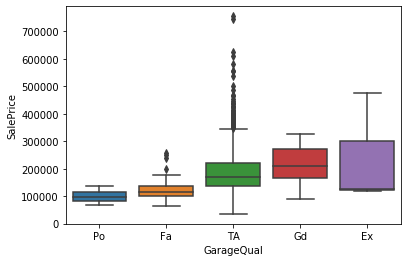

In [735]:
sns.boxplot(x='GarageQual',  y='SalePrice',  order=my_order3, data=house_train2)

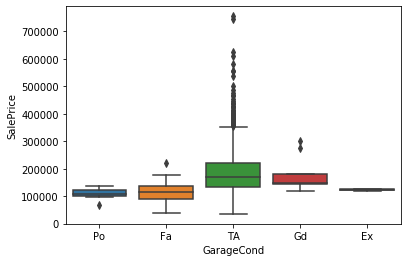

In [736]:
sns.boxplot(x='GarageCond',  y='SalePrice', order=my_order3, data=house_train2)

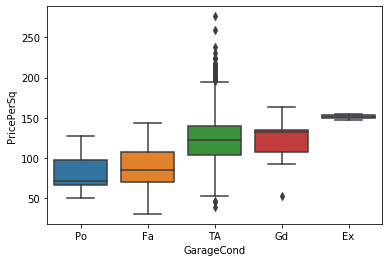

In [737]:
sns.boxplot(x='GarageCond',  y='PricePerSq', order=my_order3, data=house_train2)

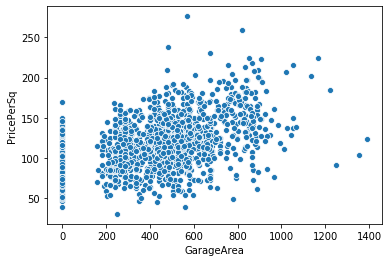

In [741]:
sns.scatterplot(x='GarageArea',  y='PricePerSq', data=house_train2)

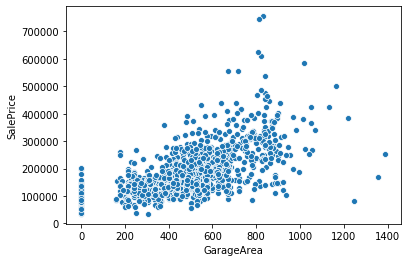

In [742]:
sns.scatterplot(x='GarageArea',  y='SalePrice', data=house_train2)

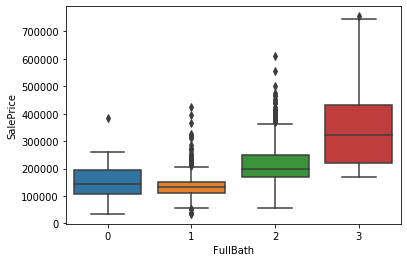

In [763]:
sns.boxplot(x='FullBath',  y='SalePrice', data=house_train2)

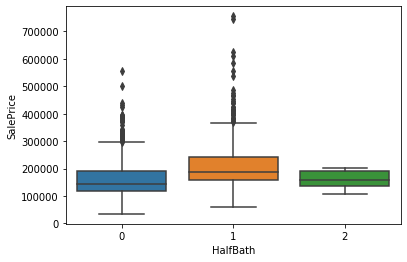

In [764]:
sns.boxplot(x='HalfBath',  y='SalePrice', data=house_train2)

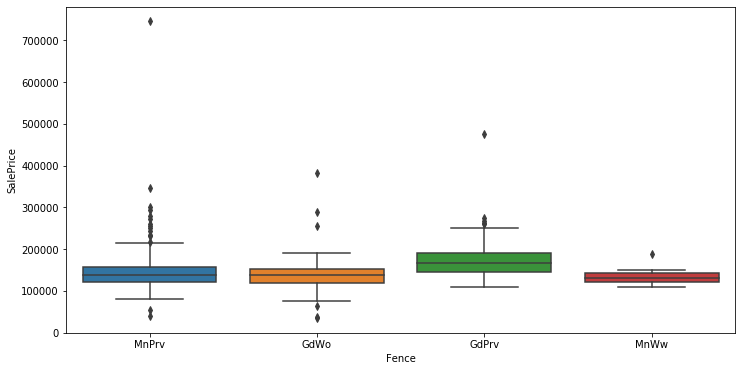

In [766]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Fence',  y='SalePrice', data=house_train2)

In [783]:
house_train2.groupby('Fence')['SalePrice'].median()

Fence
GdPrv    167500
GdWo     138750
MnPrv    137450
MnWw     130000
Name: SalePrice, dtype: int64

In [784]:
house_train2.groupby('Fence')['SalePrice'].mean()

Fence
GdPrv    178927.457627
GdWo     140379.314815
MnPrv    148751.089172
MnWw     134286.363636
Name: SalePrice, dtype: float64

In [785]:
house_train2.groupby('Fence')['PricePerSq'].median()

Fence
GdPrv    114.646465
GdWo     111.726081
MnPrv    116.199713
MnWw     128.761574
Name: PricePerSq, dtype: float64

In [787]:
house_train2.groupby('Fence')['PricePerSq'].mean()

Fence
GdPrv    113.922273
GdWo     109.945391
MnPrv    113.877330
MnWw     120.336095
Name: PricePerSq, dtype: float64

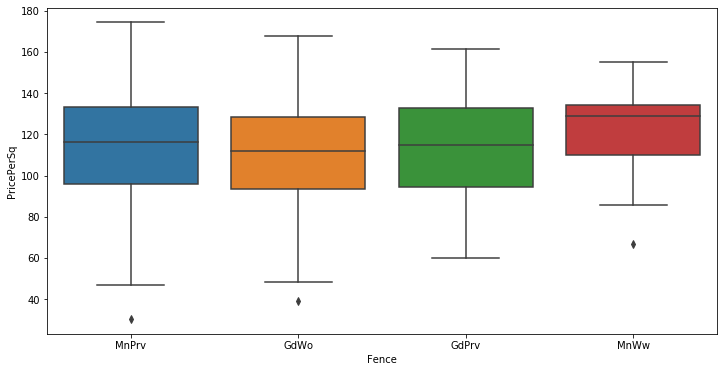

In [768]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Fence',  y='PricePerSq', data=house_train2)

# Other Features Of Houses vs Sale Price & Price Per Sqft

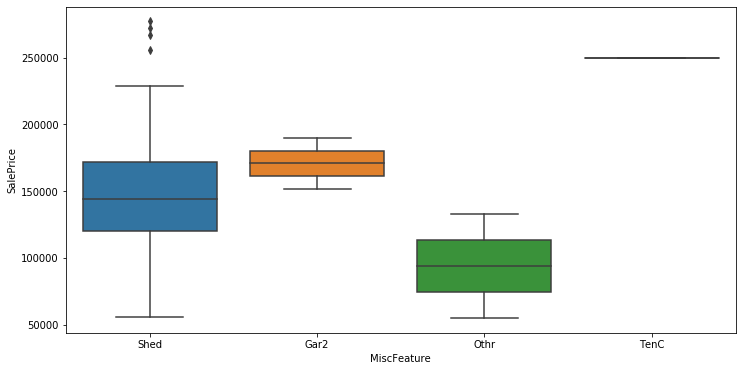

In [767]:
plt.figure(figsize=(12,6))
sns.boxplot(x='MiscFeature',  y='SalePrice', data=house_train2)

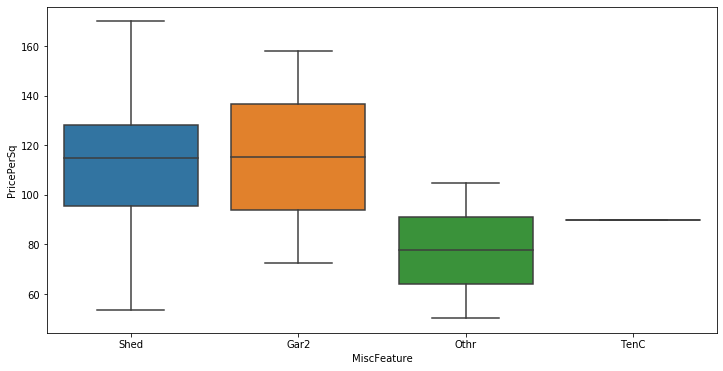

In [769]:
plt.figure(figsize=(12,6))
sns.boxplot(x='MiscFeature',  y='PricePerSq', data=house_train2)

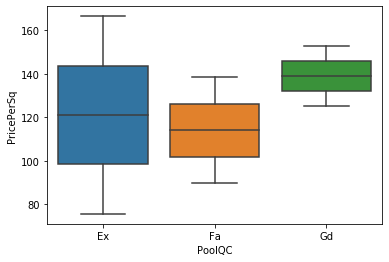

In [632]:
sns.boxplot(x='PoolQC',  y='PricePerSq',data=house_train2)

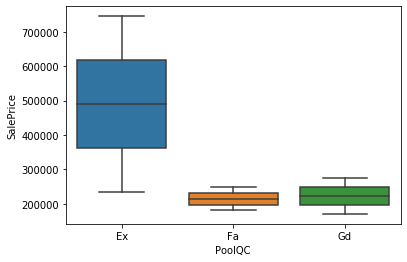

In [633]:
sns.boxplot(x='PoolQC',  y='SalePrice', data=house_train2)

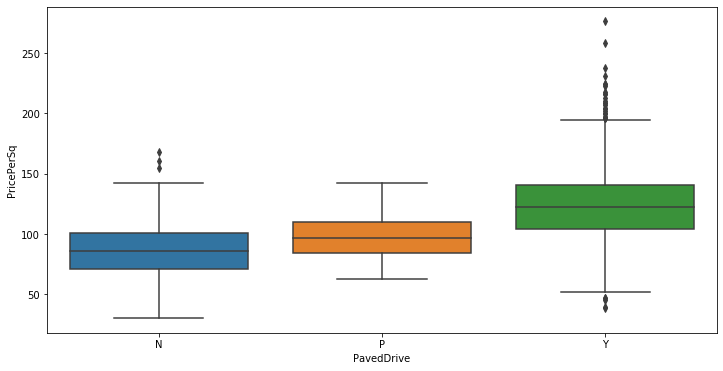

In [634]:
plt.figure(figsize=(12,6))
my_order_pave = house_train2.groupby('PavedDrive')['PricePerSq'].median().sort_values(ascending=True).index
sns.boxplot(x='PavedDrive',  y='PricePerSq', order=my_order_pave, data=house_train2)

In [770]:
house_train2.groupby('PavedDrive')['PricePerSq'].median()

PavedDrive
N     85.725082
P     96.816549
Y    122.362062
Name: PricePerSq, dtype: float64

In [771]:
house_train2.groupby('PavedDrive')['PricePerSq'].mean()

PavedDrive
N     88.847694
P     97.608876
Y    123.351251
Name: PricePerSq, dtype: float64

In [939]:
(97.608876-88.847694)/88.847694

0.09860899710013847

In [940]:
(123.351251-97.608876)/97.608876

0.26372985792808445

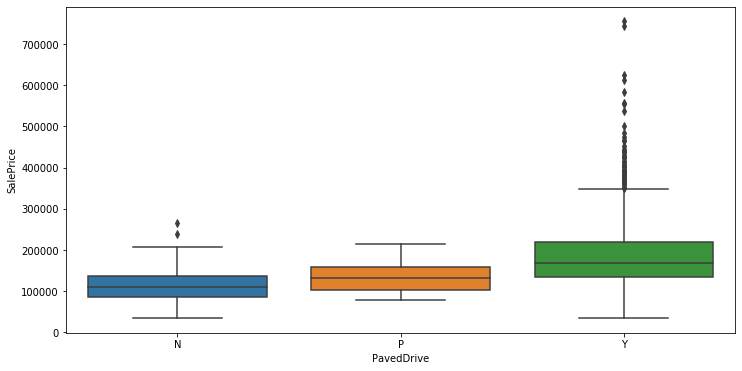

In [642]:
plt.figure(figsize=(12,6))
my_order_pave2 = house_train2.groupby('PavedDrive')['SalePrice'].median().sort_values(ascending=True).index
sns.boxplot(x='PavedDrive',  y='SalePrice', order= my_order_pave2, data=house_train2)

In [772]:
 house_train2.groupby('PavedDrive')['SalePrice'].median()

PavedDrive
N    111000
P    132250
Y    168500
Name: SalePrice, dtype: int64

In [774]:
 house_train2.groupby('PavedDrive')['SalePrice'].mean()

PavedDrive
N    115039.122222
P    132330.000000
Y    186454.988789
Name: SalePrice, dtype: float64

In [2]:
(132330.000000-115039.122222)/115039.122222

0.15030432642412234

In [1]:
(186454.988789-132330.000000)/132330.000000

0.40901525571676867

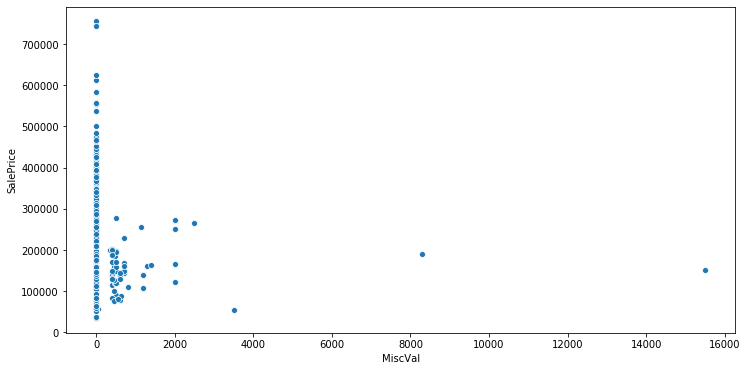

In [643]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='MiscVal',  y='SalePrice', data=house_train2)   #no obvious relationship

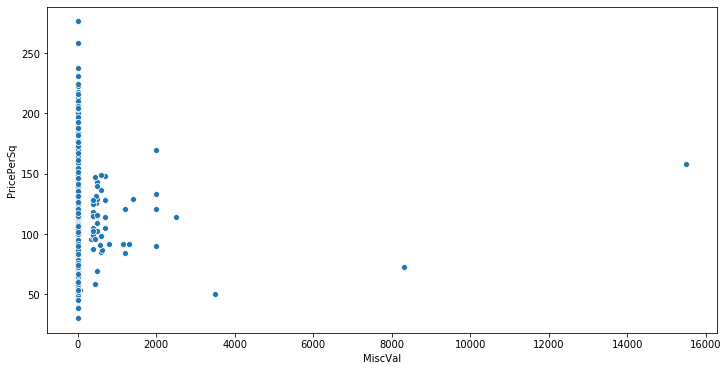

In [644]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='MiscVal',  y='PricePerSq', data=house_train2)  #no obvious relationship

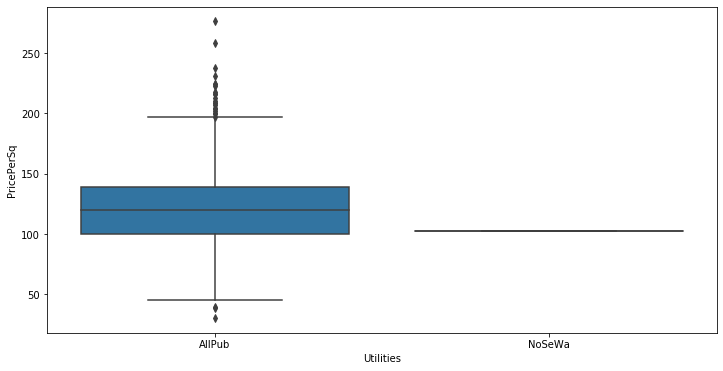

In [444]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Utilities',  y='PricePerSq', data=house_train2)

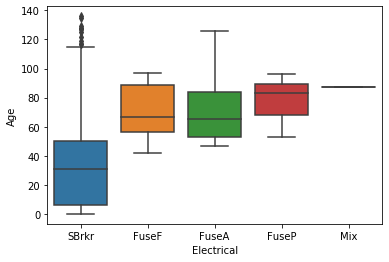

In [819]:
sns.boxplot(x='Electrical',  y='Age', data=house_train2)

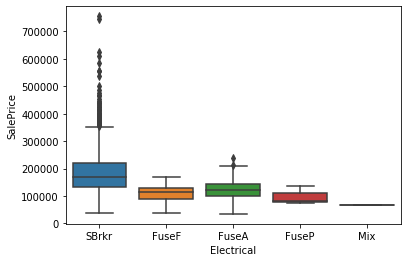

In [820]:
sns.boxplot(x='Electrical',  y='SalePrice', data=house_train2)

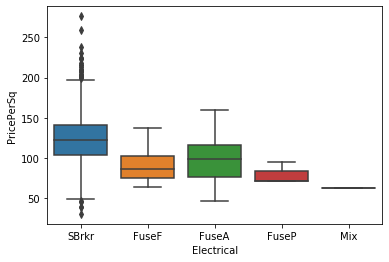

In [821]:
sns.boxplot(x='Electrical',  y='PricePerSq', data=house_train2)

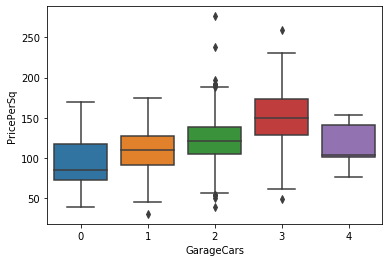

In [817]:
sns.boxplot(x='GarageCars',  y='PricePerSq', data=house_train2)

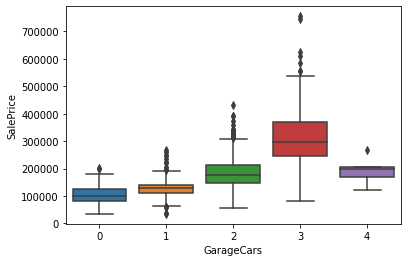

In [818]:
sns.boxplot(x='GarageCars',  y='SalePrice', data=house_train2)

In [889]:
house_train2.groupby('GarageCars')['SalePrice'].mean()

GarageCars
0    103317.283951
1    128116.688347
2    183880.645200
3    310329.933333
4    192655.800000
Name: SalePrice, dtype: float64

In [891]:
(128116.688347-103317.283951)/103317.283951  #0,1

0.2400315169702055

In [892]:
(183880.645200-128116.688347)/128116.688347 #1,2

0.43525911864007194

In [893]:
(310329.933333-183880.645200)/183880.645200  #2,3

0.6876704614314677

In [890]:
house_train2.groupby('GarageCars')['PricePerSq'].mean()

GarageCars
0     93.864315
1    109.273935
2    121.952581
3    150.564776
4    114.961533
Name: PricePerSq, dtype: float64

In [894]:
 (109.273935- 93.864315)/ 93.864315

0.16416909876772648

In [895]:
(121.952581-109.273935)/109.273935

0.11602626005918064

In [896]:
(150.564776-121.952581)/121.952581

0.23461737968464974

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

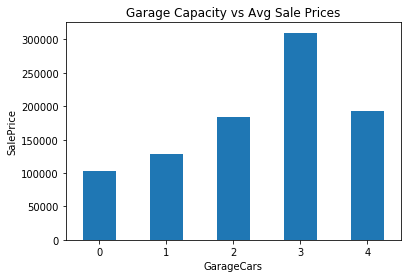

In [897]:
house_train2.groupby('GarageCars')['SalePrice'].mean().plot.bar(x='GarageCars', y='SalePrice')
plt.title('Garage Capacity vs Avg Sale Prices')
plt.ylabel('SalePrice')
plt.xticks(rotation=1)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

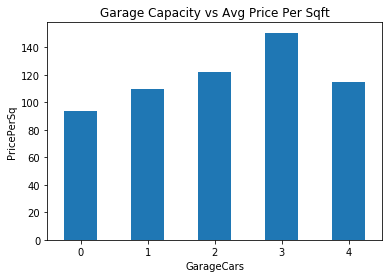

In [898]:
house_train2.groupby('GarageCars')['PricePerSq'].mean().plot.bar(x='GarageCars', y='PricePerSq')
plt.title('Garage Capacity vs Avg Price Per Sqft')
plt.ylabel('PricePerSq')
plt.xticks(rotation=1)

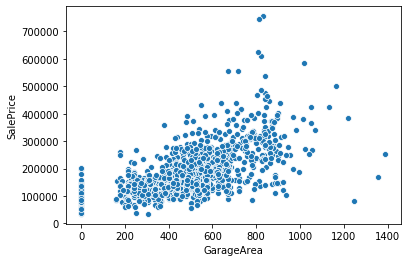

In [853]:
sns.scatterplot(x='GarageArea',  y='SalePrice', data=house_train2)

In [856]:
house_train2[house_train2['GarageCars']>3]['GarageArea']

Id
421      784
748      864
1191    1356
1341     480
1351     968
Name: GarageArea, dtype: int64

# Age, Remodel vs Sale Price & Price Per Sqft

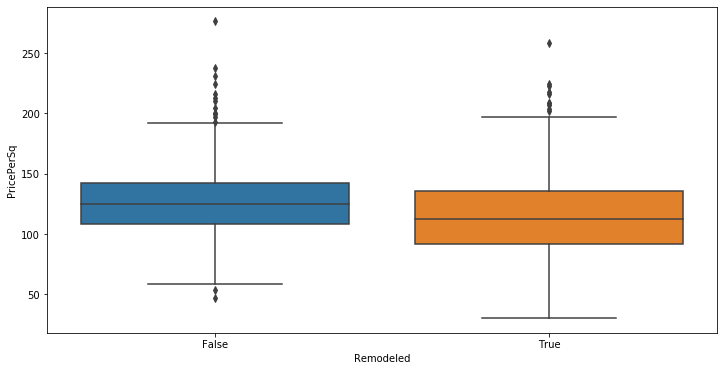

In [505]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Remodeled',  y='PricePerSq', data=house_train2)

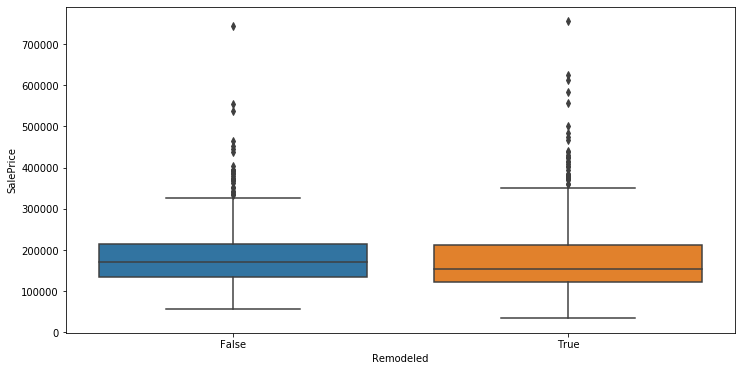

In [506]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Remodeled',  y='SalePrice', data=house_train2)

In [282]:
house_train2.groupby('Remodeled')['SalePrice'].mean()

Remodeled
False    182613.258191
True     179088.172662
Name: SalePrice, dtype: float64

In [283]:
house_train2.groupby('Remodeled')['PricePerSq'].mean()

Remodeled
False    125.375436
True     115.549749
Name: PricePerSq, dtype: float64

In [284]:
(125.375436-115.549749)/115.549749

0.08503425654347364

In [285]:
 (182613-179088)/179088

0.019683060841597426

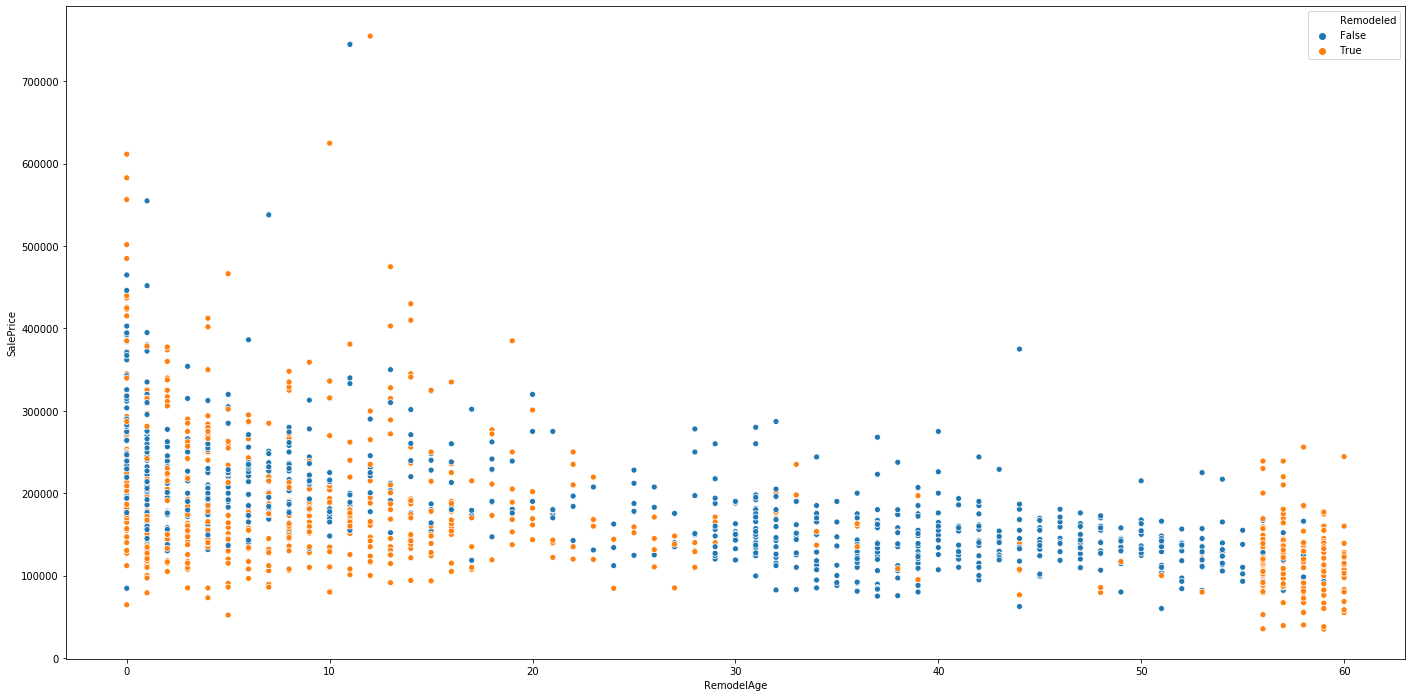

In [291]:
plt.figure(figsize=(24,12))
sns.scatterplot(x='RemodelAge', y='SalePrice', hue='Remodeled', data=house_train2)

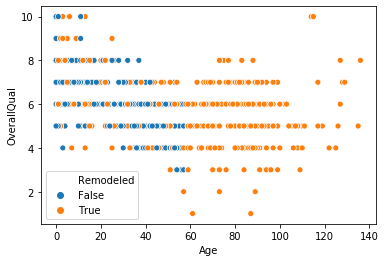

In [904]:
#plt.figure(figsize=(24,12))
sns.scatterplot(x='Age', y='OverallQual', hue='Remodeled', data=house_train2)

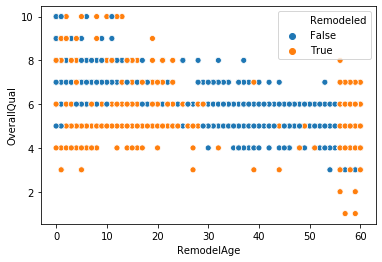

In [867]:
#plt.figure(figsize=(24,12))
sns.scatterplot(x='RemodelAge', y='OverallQual', hue='Remodeled', data=house_train2)

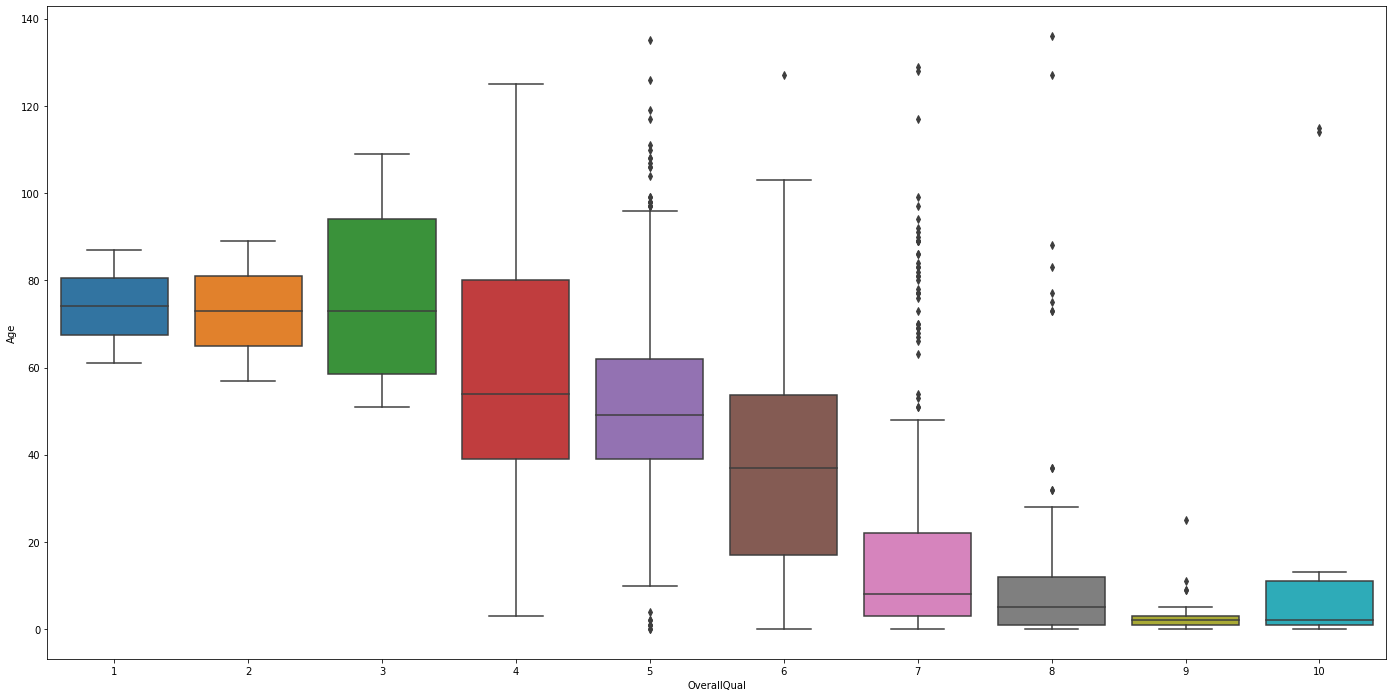

In [909]:
plt.figure(figsize=(24,12))
sns.boxplot(x='OverallQual', y='Age', data=house_train2)

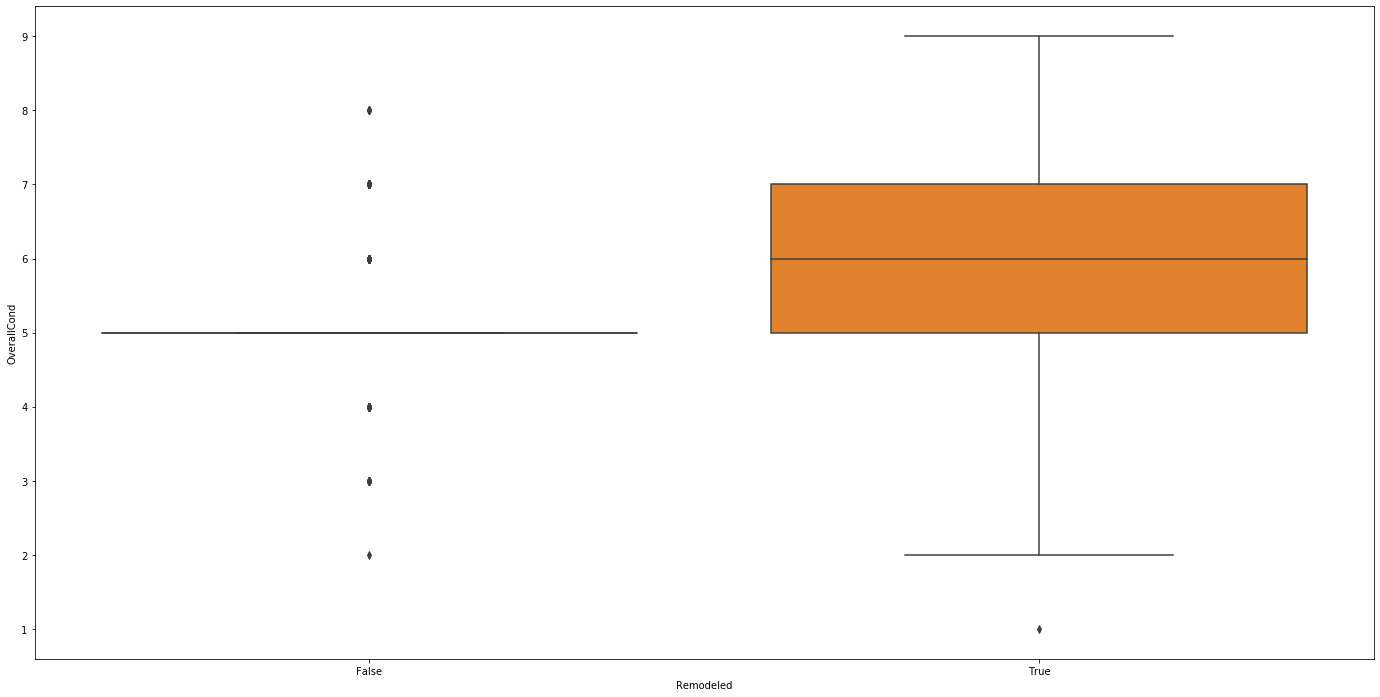

In [859]:
plt.figure(figsize=(24,12))
sns.boxplot(x='Remodeled', y='OverallCond', data=house_train2)

In [308]:
house_train2[house_train2['Age']>=60].groupby('Remodeled').count()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,MoSold,YrSold,SaleType,SaleCondition,SalePrice,PricePerSq,Age,RemodelAge,GarageAge,HasGarage
Remodeled,,,,,,,,,,,,,,,,,,,,,
True,303,303,278,303,303,62,303,303,303,303,...,303,303,303,303,303,303,303,303,255,303


In [305]:
house_train2[house_train2['Remodeled']]==True

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,YrSold,SaleType,SaleCondition,SalePrice,PricePerSq,Age,RemodelAge,Remodeled,GarageAge,HasGarage
Id,,,,,,,,,,,,,,,,,,,,,
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
1456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
1457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True


In [309]:
303/695

0.43597122302158275

Text(0.5, 0, 'House Age')

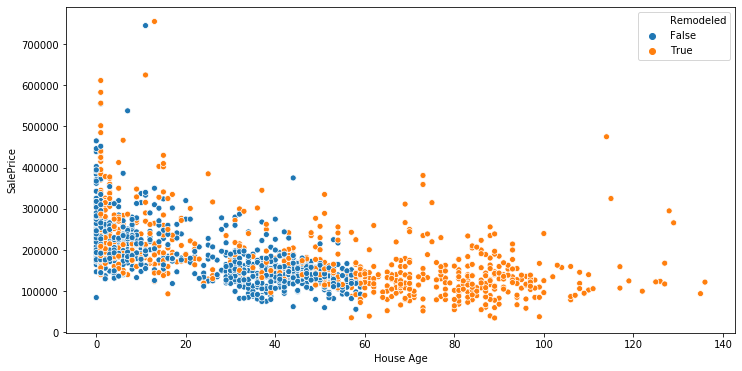

In [298]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Age', y='SalePrice', hue='Remodeled', data=house_train2)
plt.xlabel('House Age')

Text(0.5, 0, 'House Age')

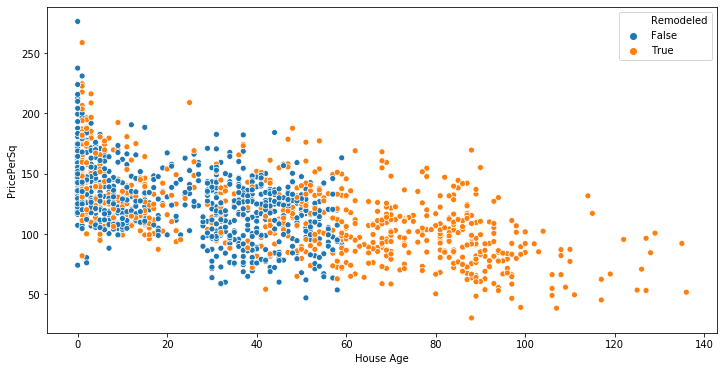

In [507]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Age', y='PricePerSq', hue='Remodeled', data=house_train2)
plt.xlabel('House Age')

In [465]:
age60=house_train2[house_train2['Age']>=60]

Text(0.5, 0, 'House Age')

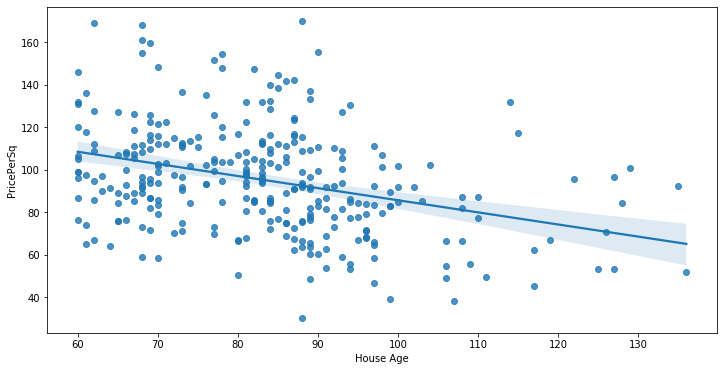

In [653]:
plt.figure(figsize=(12,6))
sns.regplot(x='Age', y='PricePerSq', data=age60)
plt.xlabel('House Age')

In [ ]:
age60=house_train2[house_train2['Age']>=60]

Text(0.5, 0, 'House Age')

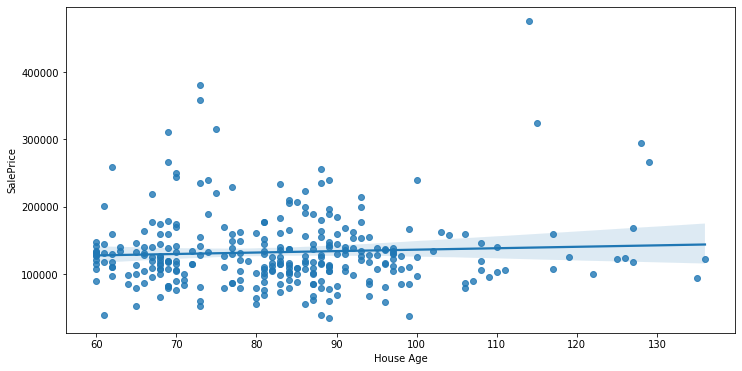

In [504]:
plt.figure(figsize=(12,6))
sns.regplot(x='Age', y='SalePrice', data=age60)
plt.xlabel('House Age')

In [475]:
age0_59=house_train2[house_train2['Age'].between(0, 59,inclusive = True)]

Text(0.5, 0, 'House Age')

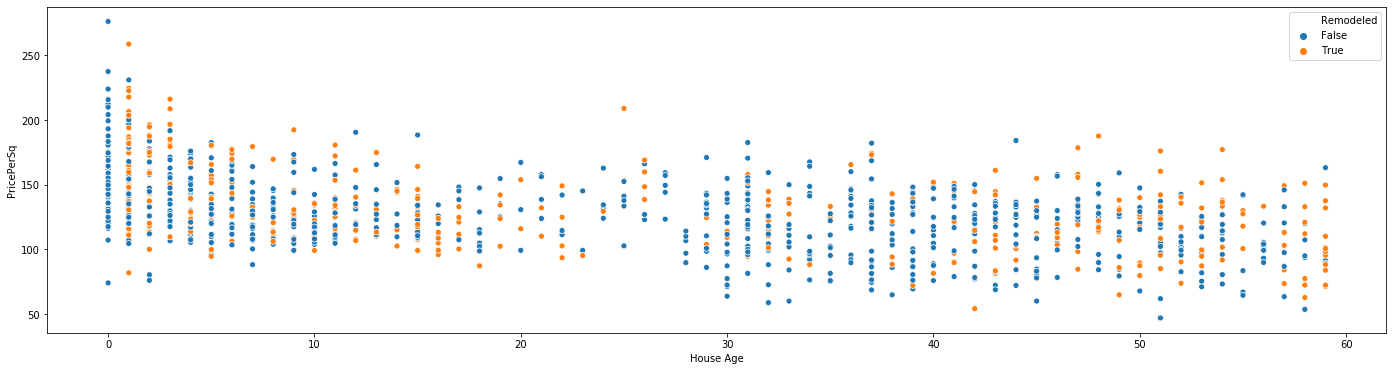

In [515]:
plt.figure(figsize=(24,6))
sns.scatterplot(x='Age', y='PricePerSq', hue='Remodeled', data=age0_59)
plt.xlabel('House Age')

Text(0.5, 0, 'House Age')

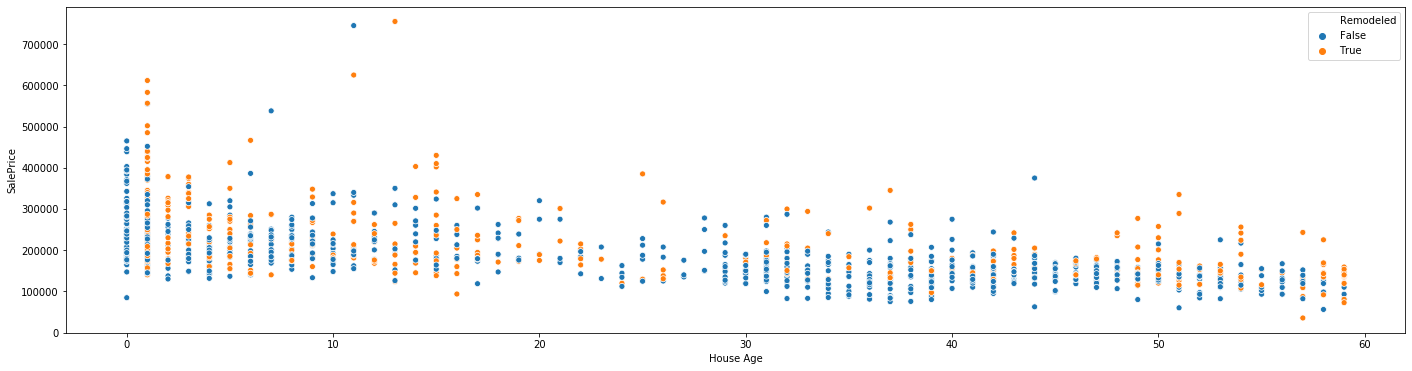

In [514]:
plt.figure(figsize=(24,6))
sns.scatterplot(x='Age', y='SalePrice', hue='Remodeled', data=age0_59)
plt.xlabel('House Age')

In [509]:
age0_59=house_train2[house_train2['Age'].between(0, 59,inclusive = True)]

In [510]:
age0_59

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,YrSold,SaleType,SaleCondition,SalePrice,PricePerSq,Age,RemodelAge,Remodeled,GarageAge,HasGarage
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,2008,WD,Normal,208500,121.929825,5,5,False,5.0,True
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,2007,WD,Normal,181500,143.819334,31,31,False,31.0,True
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,2008,WD,Normal,223500,125.139978,7,6,True,7.0,True
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,2008,WD,Normal,250000,113.739763,8,8,False,8.0,True
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,2009,WD,Normal,143000,104.992658,16,14,True,16.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,20,RL,90.0,17217,Pave,NaN,Reg,Lvl,AllPub,Inside,...,2006,WD,Abnorml,84500,74.122807,0,0,False,NaN,False
1455,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,Inside,...,2009,WD,Normal,185000,151.515152,5,4,True,5.0,True
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,2007,WD,Normal,175000,106.253795,8,7,True,8.0,True


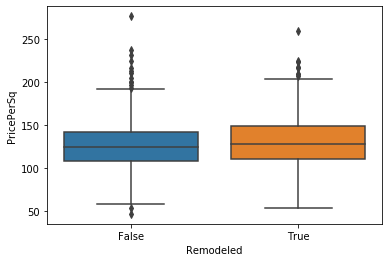

In [516]:
sns.boxplot(x='Remodeled',  y='PricePerSq', data=age0_59)

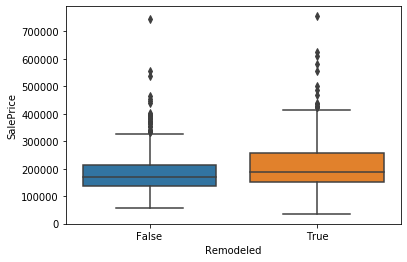

In [517]:
sns.boxplot(x='Remodeled',  y='SalePrice', data=age0_59)

In [501]:
house_train2[house_train2['Age'].between(40, 59,inclusive = True)].groupby('Remodeled')['PricePerSq'].mean()

Remodeled
False    112.925660
True     116.538757
Name: PricePerSq, dtype: float64

In [500]:
house_train2[house_train2['Age'].between(20, 39,inclusive = True)].groupby('Remodeled')['PricePerSq'].mean()

Remodeled
False    118.427738
True     126.196137
Name: PricePerSq, dtype: float64

In [469]:
house_train2[house_train2['Age'].between(0, 19,inclusive = True)].groupby('Remodeled')['PricePerSq'].mean()

Remodeled
False    137.142317
True     141.142808
Name: PricePerSq, dtype: float64

In [518]:
(116.54- 112.93)/112.93  #40-59 3.2% increase

0.03196670503851943

In [520]:
(126.20-118.43)/118.43  #20-39   6.6% increase

0.06560837625601618

In [522]:
(141.14-137.14)/137.14 #0-19     3% increase

0.029167274318214965

In [409]:
house_train2[house_train2['Age'].between(40, 59,inclusive = True)].groupby('Remodeled')['SalePrice'].mean()

Remodeled
False    139179.695238
True     156695.680000
Name: SalePrice, dtype: float64

In [523]:
(156695.68-139179.70)/139179.70   #40-59  #12.6% increase

0.12585154300519386

In [405]:
house_train2[house_train2['Age'].between(20, 39,inclusive = True)].groupby('Remodeled')['SalePrice'].mean()

Remodeled
False    151715.076923
True     190699.090909
Name: SalePrice, dtype: float64

In [524]:
(190699.10-151715.08)/151715.08  #20-39  #25.7% increase

0.2569554720598639

In [471]:
house_train2[house_train2['Age'].between(0, 19,inclusive = True)].groupby('Remodeled')['SalePrice'].mean() #1-19

Remodeled
False    227679.547826
True     255613.627358
Name: SalePrice, dtype: float64

In [525]:
(255613.63-227679.55)/227679.55 #1-19  #12.3$ % increasae

0.1226903338486044

In [378]:
(156695.680000-139179.695238)/139179.695238  #40-59

0.12585158152593545

In [380]:
house_train2[house_train2['Age']<40].groupby('Remodeled')['PricePerSq'].mean()

Remodeled
False    130.103199
True     138.063906
Name: PricePerSq, dtype: float64

In [381]:
(138.063906-130.103199)/130.103199

0.06118763459459605

In [368]:
(141.142808-137.142317)/137.142317

0.02917036176368532

In [383]:
house_train2[house_train2['Age']<40].groupby('Remodeled')['SalePrice'].mean()

Remodeled
False    199107.016275
True     242241.719101
Name: SalePrice, dtype: float64

In [384]:
(242241.719101-199107.016275)/199107.016275

0.21664079766241776

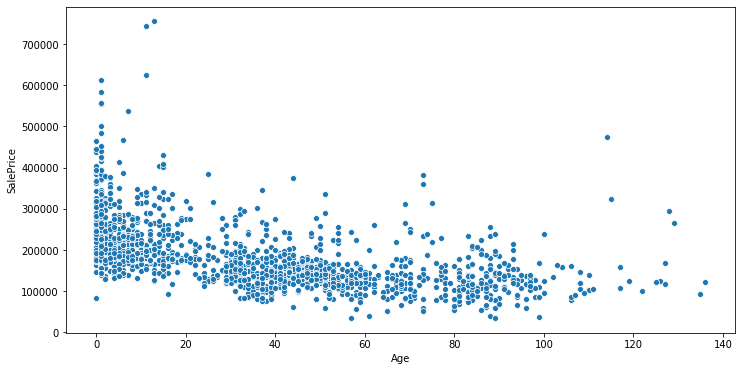

In [364]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Age', y='SalePrice', data=house_train2)

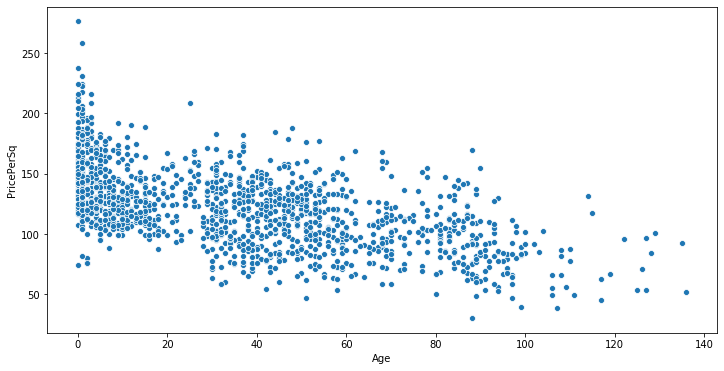

In [98]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Age', y='PricePerSq', data=house_train2)

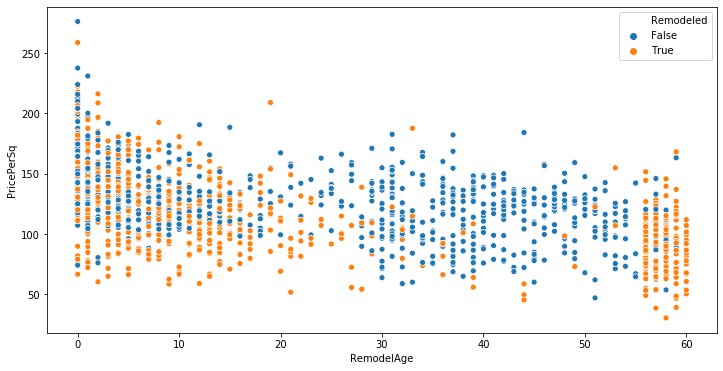

In [527]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='RemodelAge', y='PricePerSq', hue='Remodeled',data=house_train2)

In [532]:
remodel_age=house_train2[house_train2['Remodeled']==True]

In [533]:
remodel_age

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,YrSold,SaleType,SaleCondition,SalePrice,PricePerSq,Age,RemodelAge,Remodeled,GarageAge,HasGarage
Id,,,,,,,,,,,,,,,,,,,,,
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,2008,WD,Normal,223500,125.139978,7,6,True,7.0,True
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,2006,WD,Abnorml,140000,81.537566,91,36,True,8.0,True
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,2009,WD,Normal,143000,104.992658,16,14,True,16.0,True
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,2007,WD,Normal,307000,181.227863,3,2,True,3.0,True
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,2008,WD,Abnorml,129900,73.224352,77,58,True,77.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,Inside,...,2009,WD,Normal,185000,151.515152,5,4,True,5.0,True
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,2007,WD,Normal,175000,106.253795,8,7,True,8.0,True
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,2010,WD,Normal,210000,101.302460,32,22,True,32.0,True


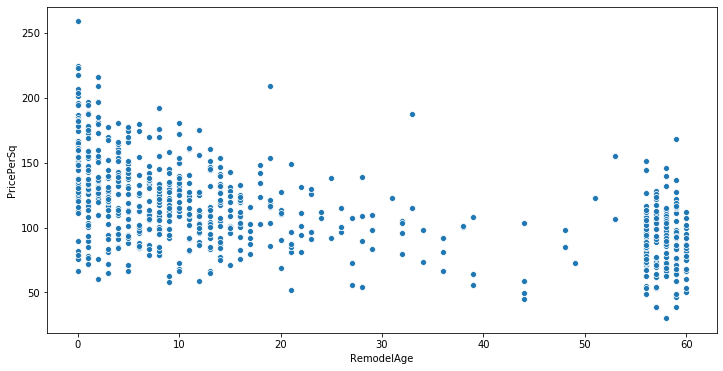

In [534]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='RemodelAge', y='PricePerSq',data=remodel_age)

In [538]:
remodel_age[remodel_age['RemodelAge'].between(40, 59,inclusive = True)]['PricePerSq'].mean()

92.36370018077076

In [539]:
remodel_age[remodel_age['RemodelAge'].between(20, 39,inclusive = True)]['PricePerSq'].mean()

99.27807938750482

In [540]:
remodel_age[remodel_age['RemodelAge'].between(0, 19,inclusive = True)]['PricePerSq'].mean()

126.85170901039066

In [541]:
remodel_age[remodel_age['RemodelAge'].between(40, 59,inclusive = True)]['SalePrice'].mean()

117437.88535031847

In [542]:
remodel_age[remodel_age['RemodelAge'].between(20, 39,inclusive = True)]['SalePrice'].mean()

157906.2105263158

In [543]:
remodel_age[remodel_age['RemodelAge'].between(0, 19,inclusive = True)]['SalePrice'].mean()

205369.91774891774

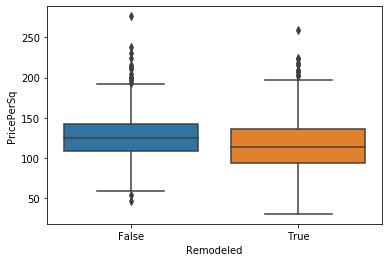

In [530]:
sns.boxplot(x='Remodel',  y='PricePerSq', data=remodel_age0_59)

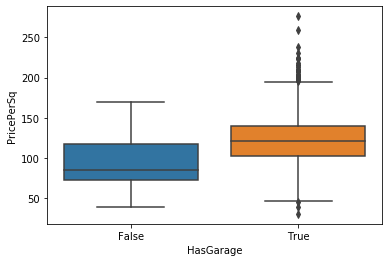

In [411]:
sns.boxplot(x='HasGarage',  y='PricePerSq', data=house_train2)

In [412]:
house_train2.groupby('HasGarage')['SalePrice'].mean()

HasGarage
False    103317.283951
True     185498.544662
Name: SalePrice, dtype: float64

In [413]:
house_train2.groupby('HasGarage')['PricePerSq'].mean()

HasGarage
False     93.864315
True     122.269806
Name: PricePerSq, dtype: float64

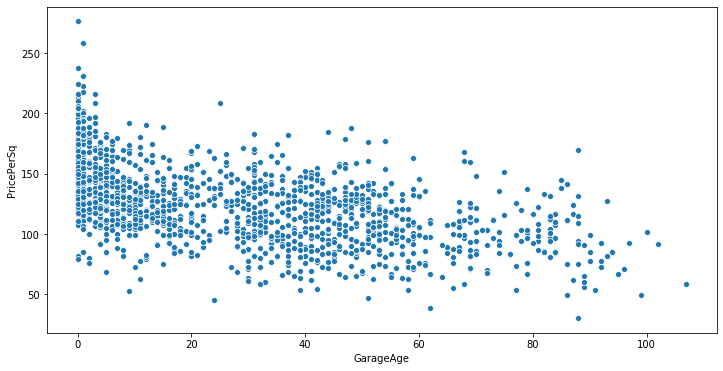

In [566]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='GarageAge',  y='PricePerSq', data=house_train2)

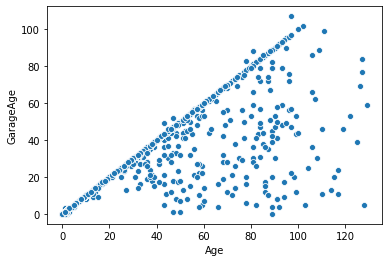

In [578]:
sns.scatterplot(x='Age',  y='GarageAge', data=house_train2)

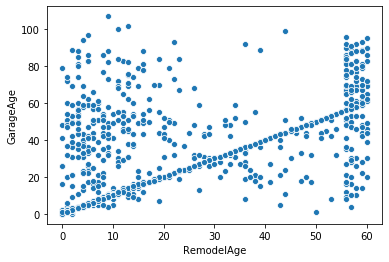

In [579]:
sns.scatterplot(x='RemodelAge',  y='GarageAge', data=house_train2)

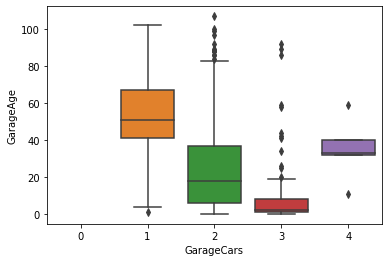

In [567]:
sns.boxplot(x='GarageCars',  y='GarageAge', data=house_train2)

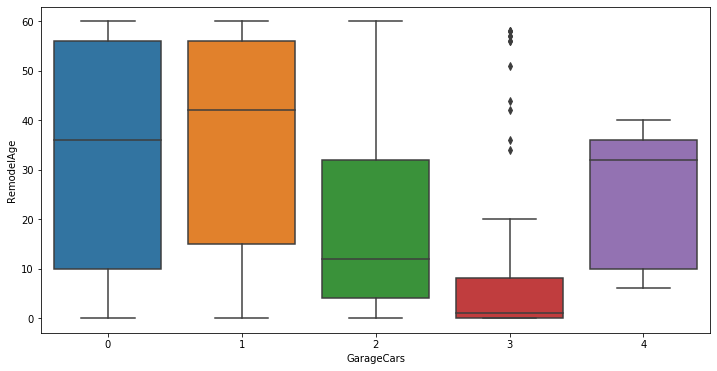

In [574]:
plt.figure(figsize=(12,6))
sns.boxplot(x='GarageCars',  y='RemodelAge', data=house_train2)

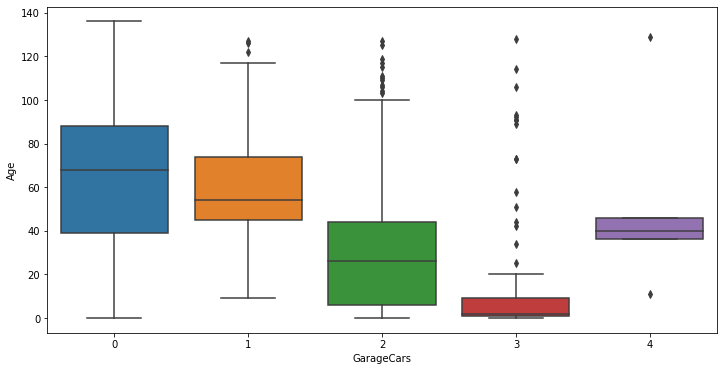

In [577]:
plt.figure(figsize=(12,6))
sns.boxplot(x='GarageCars',  y='Age', data=house_train2)

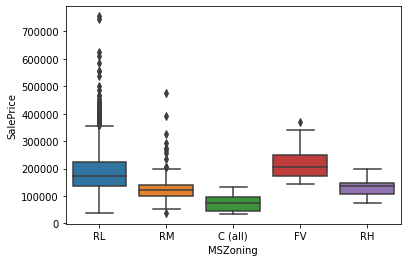

In [547]:
sns.scatterplot(x='RemodelAge',  y='GarageAge', data=house_train2)

# Zoning, Class, Neighborhood

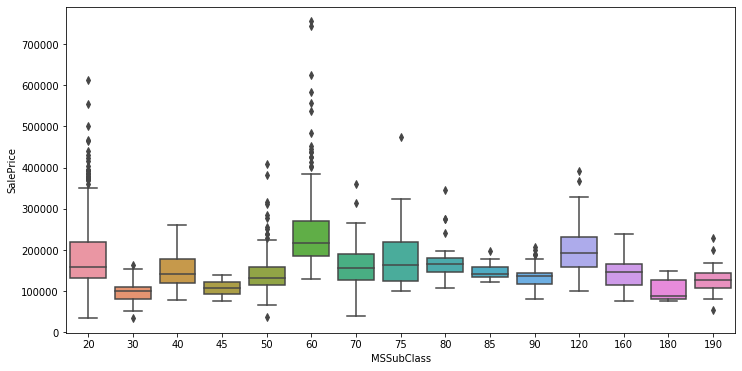

In [549]:
plt.figure(figsize=(12,6))
sns.boxplot(x='MSSubClass',  y='SalePrice', data=house_train2)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

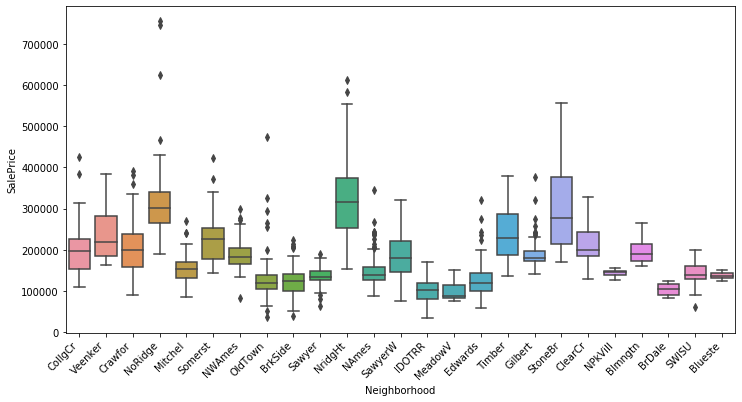

In [552]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Neighborhood',  y='SalePrice', data=house_train2)
plt.xticks(rotation=45, ha="right")

In [561]:
plt.figure(figsize=(12,6))
house_train2.groupby('Neighborhood')['SalePrice'].mean().head(10).sort_values(ascending=False)

#sns.boxplot(x='Neighborhood',  y='SalePrice', data=house_train2)
#plt.xticks(rotation=45, ha="right")

Neighborhood
ClearCr    212565.428571
Crawfor    210624.725490
CollgCr    197965.773333
Blmngtn    194870.882353
Gilbert    192854.506329
Blueste    137500.000000
Edwards    127318.571429
BrkSide    124834.051724
BrDale     104493.750000
IDOTRR     100123.783784
Name: SalePrice, dtype: float64

<Figure size 864x432 with 0 Axes>

In [559]:
plt.figure(figsize=(12,6))
house_train2.groupby('Neighborhood')['SalePrice'].median().head(10).sort_values(ascending=False)

Neighborhood
Crawfor    200624
ClearCr    200250
CollgCr    197200
Blmngtn    191000
Gilbert    181000
Blueste    137500
BrkSide    124300
Edwards    119500
BrDale     106000
IDOTRR     103000
Name: SalePrice, dtype: int64

<Figure size 864x432 with 0 Axes>

# Central Air

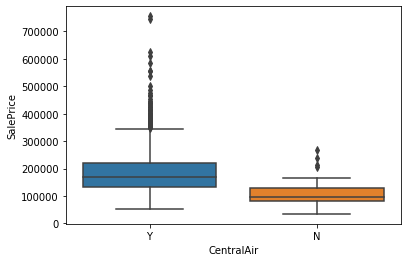

In [582]:
sns.boxplot(x='CentralAir',  y='SalePrice', data=house_train2)

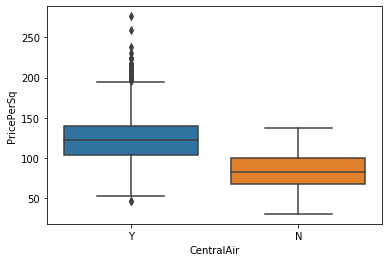

In [652]:
sns.boxplot(x='CentralAir',  y='PricePerSq', data=house_train2)

In [806]:
house_train2.groupby('CentralAir')['SalePrice'].median()

CentralAir
N     98000
Y    168000
Name: SalePrice, dtype: int64

In [865]:
house_train2.groupby('CentralAir')['PricePerSq'].mean()

CentralAir
N     84.195612
Y    123.235473
Name: PricePerSq, dtype: float64

In [866]:
(123.235473- 84.195612)/ 84.195612

0.4636804706639582

In [808]:
(168000-98000)/98000

0.7142857142857143

In [807]:
house_train2.groupby('CentralAir')['SalePrice'].mean()

CentralAir
N    105264.073684
Y    186206.976522
Name: SalePrice, dtype: float64

In [811]:
(186206.976522-105264.073684)/105264.073684

0.7689508870898203

In [809]:
house_train2.groupby('CentralAir')['PricePerSq'].median()

CentralAir
N     82.961862
Y    122.143420
Name: PricePerSq, dtype: float64

In [812]:
(122.143420-82.961862)/82.961862

0.47228397549707857

In [810]:
house_train2.groupby('CentralAir')['PricePerSq'].mean()

CentralAir
N     84.195612
Y    123.235473
Name: PricePerSq, dtype: float64

In [822]:
(123.235473-84.195612)/84.195612

0.4636804706639582

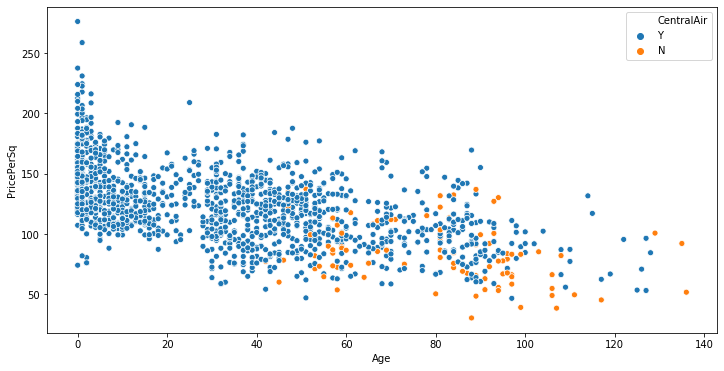

In [814]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Age', y='PricePerSq', hue='CentralAir',data=house_train2)

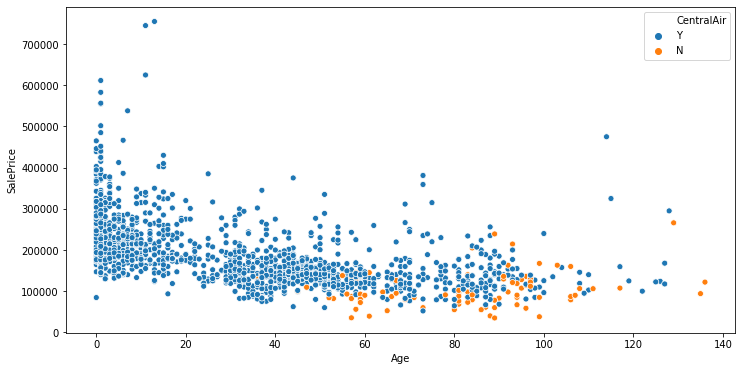

In [815]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Age', y='SalePrice', hue='CentralAir',data=house_train2)

In [848]:
house_train2[house_train2['CentralAir']=='Y']

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,YrSold,SaleType,SaleCondition,SalePrice,PricePerSq,Age,RemodelAge,Remodeled,GarageAge,HasGarage
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,2008,WD,Normal,208500,121.929825,5,5,False,5.0,True
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,2007,WD,Normal,181500,143.819334,31,31,False,31.0,True
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,2008,WD,Normal,223500,125.139978,7,6,True,7.0,True
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,2006,WD,Abnorml,140000,81.537566,91,36,True,8.0,True
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,2008,WD,Normal,250000,113.739763,8,8,False,8.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,2007,WD,Normal,175000,106.253795,8,7,True,8.0,True
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,2010,WD,Normal,210000,101.302460,32,22,True,32.0,True
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,2010,WD,Normal,266500,113.888889,69,4,True,69.0,True


In [851]:
house_train2['CentralAir']

Id
1       Y
2       Y
3       Y
4       Y
5       Y
       ..
1456    Y
1457    Y
1458    Y
1459    Y
1460    Y
Name: CentralAir, Length: 1458, dtype: object

In [852]:
1363/1458

0.9348422496570644

In [823]:
age_55_140=house_train2[house_train2['Age'].between(50, 140,inclusive = True)]

In [824]:
age_55_140.groupby('CentralAir')['SalePrice'].mean()

CentralAir
N    104203.224719
Y    142160.122951
Name: SalePrice, dtype: float64

In [829]:
age_55_140.groupby('CentralAir')['PricePerSq'].mean()

CentralAir
N     83.048153
Y    104.413782
Name: PricePerSq, dtype: float64

In [827]:
 (142160.122951-104203.224719)/104203.224719

0.3642583838874142

In [832]:
(104.413782- 83.048153)/83.048153

0.2572679611550181

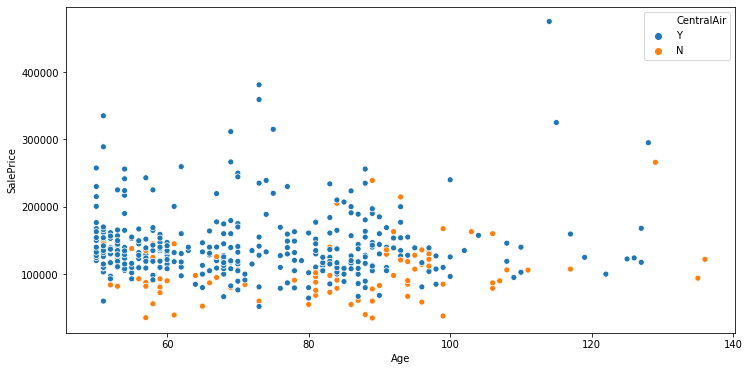

In [825]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Age', y='SalePrice', hue='CentralAir',data=age_55_140)

In [813]:
(123.235473- 84.195612)/ 84.195612

0.4636804706639582